#There are total of 7 main catergories
**1. 21 sub-categories**
<br>
**2. 41 different sub-categories**

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [9]:
path = '/content/drive/MyDrive/data.csv' #this file path will change accordingly

In [10]:
df = pd.read_csv(path)

In [11]:
df.head()

,image,name,classes
0,5da821eb7f3e301b4504bb4a_0.jpg,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...,beauty<makeup<eyeshadow
1,5da81cde7861c2af6a5a88cf_0.jpg,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...,beauty<makeup<eyeshadow
2,5da8219a6504fb65da0050aa_0.jpg,Prada Wool sweater,clothing<knitwear<fine knit
3,5da821856504fb65cea703cf_0.jpg,Prada Printed silk-satin twill straight-leg p...,clothing<pants<straight leg
4,5da82200b25b035d1d17bec6_0.jpg,Prada Cropped chain-trimmed printed crepe str...,clothing<pants<straight leg


In [12]:
df.drop('image',axis=1,inplace=True)

In [13]:
df.head()

,name,classes
0,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...,beauty<makeup<eyeshadow
1,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...,beauty<makeup<eyeshadow
2,Prada Wool sweater,clothing<knitwear<fine knit
3,Prada Printed silk-satin twill straight-leg p...,clothing<pants<straight leg
4,Prada Cropped chain-trimmed printed crepe str...,clothing<pants<straight leg


In [14]:
c1 = []
c2 = []
c3 = []
for i in range(len(df)):
  a,b,c = df['classes'][i].split('<')
  c1.append(a)
  c2.append(b)
  c3.append(c)

In [15]:
df['c1'] = c1
df['c2'] = c2
df['c3'] = c3

In [16]:
df.head()

,name,classes,c1,c2,c3
0,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...,beauty<makeup<eyeshadow,beauty,makeup,eyeshadow
1,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...,beauty<makeup<eyeshadow,beauty,makeup,eyeshadow
2,Prada Wool sweater,clothing<knitwear<fine knit,clothing,knitwear,fine knit
3,Prada Printed silk-satin twill straight-leg p...,clothing<pants<straight leg,clothing,pants,straight leg
4,Prada Cropped chain-trimmed printed crepe str...,clothing<pants<straight leg,clothing,pants,straight leg


In [17]:
df.drop('classes',axis=1,inplace=True)

In [18]:
df.head()

,name,c1,c2,c3
0,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...,beauty,makeup,eyeshadow
1,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...,beauty,makeup,eyeshadow
2,Prada Wool sweater,clothing,knitwear,fine knit
3,Prada Printed silk-satin twill straight-leg p...,clothing,pants,straight leg
4,Prada Cropped chain-trimmed printed crepe str...,clothing,pants,straight leg


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_msg, test_msg, train_labels, test_labels = train_test_split(df['name'], df['c1'], test_size=0.2, random_state=434)

In [21]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [22]:
encoder = LabelEncoder()
encoder.fit(train_labels)
encoded_Y = encoder.transform(train_labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [23]:
encoder = LabelEncoder()
encoder.fit(test_labels)
encoded_Y_test = encoder.transform(test_labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)

In [24]:
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [25]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [26]:
word_index = tokenizer.word_index
# word_index

In [27]:
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [28]:
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [29]:
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [30]:
num_epochs = 20
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded,dummy_y, epochs=num_epochs, validation_data=(testing_padded, dummy_y_test),callbacks =[early_stop], verbose=2)

Epoch 1/20
1643/1643 - 3s - loss: 0.7586 - accuracy: 0.7622 - val_loss: 0.1951 - val_accuracy: 0.9710
Epoch 2/20
1643/1643 - 2s - loss: 0.1274 - accuracy: 0.9691 - val_loss: 0.0548 - val_accuracy: 0.9838
Epoch 3/20
1643/1643 - 2s - loss: 0.0532 - accuracy: 0.9850 - val_loss: 0.0285 - val_accuracy: 0.9931
Epoch 4/20
1643/1643 - 2s - loss: 0.0319 - accuracy: 0.9916 - val_loss: 0.0181 - val_accuracy: 0.9961
Epoch 5/20
1643/1643 - 2s - loss: 0.0221 - accuracy: 0.9946 - val_loss: 0.0145 - val_accuracy: 0.9967
Epoch 6/20
1643/1643 - 2s - loss: 0.0167 - accuracy: 0.9960 - val_loss: 0.0113 - val_accuracy: 0.9973
Epoch 7/20
1643/1643 - 2s - loss: 0.0138 - accuracy: 0.9966 - val_loss: 0.0094 - val_accuracy: 0.9970
Epoch 8/20
1643/1643 - 2s - loss: 0.0109 - accuracy: 0.9974 - val_loss: 0.0078 - val_accuracy: 0.9980
Epoch 9/20
1643/1643 - 2s - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.0069 - val_accuracy: 0.9982
Epoch 10/20
1643/1643 - 2s - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0059 - 

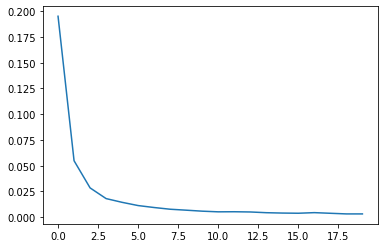

In [31]:
plt.plot(history.history['val_loss'])

In [32]:
train_msg_1, test_msg_1, train_labels_1, test_labels_1 = train_test_split(df['name'], df['c2'], test_size=0.2, random_state=434)

In [33]:
encoder_1 = LabelEncoder()
encoder_1.fit(train_labels_1)
encoded_Y_1 = encoder_1.transform(train_labels_1)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_1 = np_utils.to_categorical(encoded_Y_1)

encoder_1 = LabelEncoder()
encoder_1.fit(test_labels_1)
encoded_Y_test_1 = encoder_1.transform(test_labels_1)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test_1 = np_utils.to_categorical(encoded_Y_test_1)

tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg_1)

training_sequences_1 = tokenizer.texts_to_sequences(train_msg_1)
training_padded_1 = pad_sequences (training_sequences_1, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences_1 = tokenizer.texts_to_sequences(test_msg_1)
testing_padded_1 = pad_sequences(testing_sequences_1, maxlen = max_len, padding = padding_type, truncating = trunc_type)

model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(24, activation='relu'))
model1.add(Dropout(drop_value))
model1.add(Dense(21, activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [34]:
num_epochs = 20
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history_1 = model1.fit(training_padded_1,dummy_y_1, epochs=num_epochs, validation_data=(testing_padded_1, dummy_y_test_1),callbacks =[early_stop], verbose=2)

Epoch 1/20
1643/1643 - 3s - loss: 2.1105 - accuracy: 0.3645 - val_loss: 1.2300 - val_accuracy: 0.6904
Epoch 2/20
1643/1643 - 2s - loss: 0.9678 - accuracy: 0.7080 - val_loss: 0.5897 - val_accuracy: 0.8377
Epoch 3/20
1643/1643 - 2s - loss: 0.5787 - accuracy: 0.8300 - val_loss: 0.3615 - val_accuracy: 0.9085
Epoch 4/20
1643/1643 - 2s - loss: 0.4168 - accuracy: 0.8828 - val_loss: 0.2750 - val_accuracy: 0.9283
Epoch 5/20
1643/1643 - 2s - loss: 0.3408 - accuracy: 0.9043 - val_loss: 0.2321 - val_accuracy: 0.9373
Epoch 6/20
1643/1643 - 2s - loss: 0.2951 - accuracy: 0.9182 - val_loss: 0.2088 - val_accuracy: 0.9439
Epoch 7/20
1643/1643 - 2s - loss: 0.2629 - accuracy: 0.9269 - val_loss: 0.1898 - val_accuracy: 0.9477
Epoch 8/20
1643/1643 - 2s - loss: 0.2357 - accuracy: 0.9332 - val_loss: 0.1768 - val_accuracy: 0.9512
Epoch 9/20
1643/1643 - 2s - loss: 0.2168 - accuracy: 0.9388 - val_loss: 0.1665 - val_accuracy: 0.9511
Epoch 10/20
1643/1643 - 2s - loss: 0.2043 - accuracy: 0.9433 - val_loss: 0.1628 - 

In [35]:
train_msg_2, test_msg_2, train_labels_2, test_labels_2 = train_test_split(df['name'], df['c3'], test_size=0.2, random_state=434)

In [36]:
encoder_2 = LabelEncoder()
encoder_2.fit(train_labels_2)
encoded_Y_2 = encoder_2.transform(train_labels_2)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_2 = np_utils.to_categorical(encoded_Y_2)

encoder_2 = LabelEncoder()
encoder_2.fit(test_labels_2)
encoded_Y_test_2 = encoder_2.transform(test_labels_2)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test_2 = np_utils.to_categorical(encoded_Y_test_2)

tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg_2)

training_sequences_2 = tokenizer.texts_to_sequences(train_msg_2)
training_padded_2 = pad_sequences (training_sequences_2, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences_2 = tokenizer.texts_to_sequences(test_msg_2)
testing_padded_2 = pad_sequences(testing_sequences_2, maxlen = max_len, padding = padding_type, truncating = trunc_type)

model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(48, activation='relu'))
model2.add(Dropout(drop_value))
model2.add(Dense(24, activation='relu'))
model2.add(Dropout(drop_value))
model2.add(Dense(41, activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [37]:
num_epochs = 20
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history_2 = model2.fit(training_padded_2,dummy_y_2, epochs=num_epochs, validation_data=(testing_padded_2, dummy_y_test_2),callbacks =[early_stop], verbose=2)

Epoch 1/20
1643/1643 - 3s - loss: 2.8226 - accuracy: 0.2090 - val_loss: 1.6217 - val_accuracy: 0.5255
Epoch 2/20
1643/1643 - 2s - loss: 1.3947 - accuracy: 0.5686 - val_loss: 0.9356 - val_accuracy: 0.7409
Epoch 3/20
1643/1643 - 2s - loss: 1.0612 - accuracy: 0.6747 - val_loss: 0.7789 - val_accuracy: 0.7665
Epoch 4/20
1643/1643 - 2s - loss: 0.9292 - accuracy: 0.7077 - val_loss: 0.6978 - val_accuracy: 0.7873
Epoch 5/20
1643/1643 - 2s - loss: 0.8609 - accuracy: 0.7272 - val_loss: 0.6561 - val_accuracy: 0.8000
Epoch 6/20
1643/1643 - 2s - loss: 0.8020 - accuracy: 0.7415 - val_loss: 0.6250 - val_accuracy: 0.7966
Epoch 7/20
1643/1643 - 2s - loss: 0.7566 - accuracy: 0.7555 - val_loss: 0.6028 - val_accuracy: 0.8096
Epoch 8/20
1643/1643 - 2s - loss: 0.7168 - accuracy: 0.7649 - val_loss: 0.5649 - val_accuracy: 0.8194
Epoch 9/20
1643/1643 - 2s - loss: 0.6941 - accuracy: 0.7736 - val_loss: 0.5466 - val_accuracy: 0.8251
Epoch 10/20
1643/1643 - 2s - loss: 0.6656 - accuracy: 0.7832 - val_loss: 0.5316 - 

In [38]:
def predict_(inpt):
  training_ = tokenizer.texts_to_sequences(inpt)
  tr_padded = pad_sequences(training_, maxlen = max_len, padding = padding_type, truncating = trunc_type )
  a = np.argmax(model.predict(tr_padded.reshape([1,50])))
  prob_a = model.predict(tr_padded.reshape([1,50])).max()/(model.predict(tr_padded.reshape([1,50])).sum())
 
  b = np.argmax(model1.predict(tr_padded.reshape([1,50])))
  prob_b = model1.predict(tr_padded.reshape([1,50])).max()/(model1.predict(tr_padded.reshape([1,50])).sum())
 
  c = np.argmax(model2.predict(tr_padded.reshape([1,50])))
  prob_c = model2.predict(tr_padded.reshape([1,50])).max()/(model2.predict(tr_padded.reshape([1,50])).sum())
 
  a1 = encoder.inverse_transform([a])
  a2 = encoder_1.inverse_transform([b])
  a3 = encoder_2.inverse_transform([c])
 
  d = {'type':[a1[0],{'probability':prob_a}],'sub-type':[a2[0],{'probability':prob_b}],'additional':[a3[0],{'probability':prob_c}]}
  print(d)

In [40]:
print([test_msg[1]])
print()
print('Predicted Values and Probability')
predict_([test_msg[1]])
print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print()
print('Actual Values')
print()
print(test_labels[1])
print(test_labels_1[1])
print(test_labels_2[1])

['Marc Jacobs Beauty  Eye-Conic Longwear Eyeshadow Palette - Provocouture 710  ']

Predicted Values and Probability
{'type': ['beauty', {'probability': 1.0}], 'sub-type': ['makeup', {'probability': 0.99997425}], 'additional': ['eyeshadow', {'probability': 0.7925428}]}
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

Actual Values

beauty
makeup
eyeshadow
